# In this notebook:

* Load graph

In [1]:
from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np
import os
import json

/Users/ninawiedemann/Desktop/thesis.nosync/power_planner/powerenv/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/Users/ninawiedemann/Desktop/thesis.nosync/power_planner/powerenv/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/Users/ninawiedemann/Desktop/thesis.nosync/power_planner/powerenv/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/Users/ninawiedemann/Desktop/thesis.nosync/power_planner/powerenv/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: No module named 'cairo'
  warnings.warn(msg, RuntimeWarning)


## Load graph and pos2node

In [2]:
base_path = "../outputs/path_79112"

In [3]:
pos2node = np.load(base_path+"_pos2node.npy")

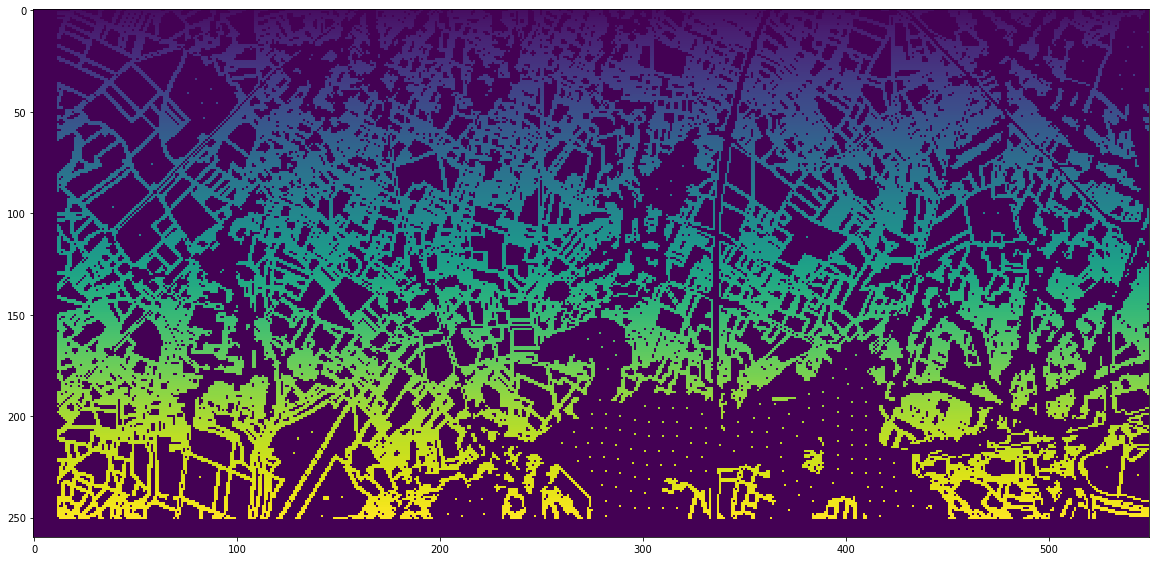

In [4]:
plt.figure(figsize=(20,10))
plt.imshow(pos2node[200:460, 50:600])
plt.show()

In [7]:
# load graph itself
graph = load_graph(base_path + "_graph.xml.gz")

In [54]:
all_costs = graph.ep.weight
cost_props = list()
for props in ["env", "urban"]:
    cost_props.append(eval("graph.ep."+props))

In [56]:
# test: all costs if combination of others
print(cost_props[0].get_array()[10], cost_props[1].get_array()[10], all_costs.get_array()[10])

0.39705882352941174 0.23809523809523808 0.21171802054154992


In [16]:
0.333333*0.238 + 0.333333*0.397

0.211666455

In [5]:
# load infos
with open(base_path+"_infos.json", "r") as infile:
    infos_path = json.load(infile)

In [19]:
## beginning: 5 293 756 edges
# start cells: [408  62] dest cells: [235 601]        
source = 58730 
dest = 12160

In [51]:
# test whether correct positions:
print(node_pos[source],node_pos[dest])

(408, 62) (235, 601)


## Forbidden edges:

Iterate over nodes, compute all critical vertices pairs 

## Shortest path

In [ ]:
def get_shortest_path(graph, source, target, weights):
    vertices_path, _ = shortest_path(
                graph,
                source,
                target,
                weights=weights,
                negative_weights=True
            )
    return vertices_path

In [57]:
vertices_path, edges_path = shortest_path(
                graph,
                graph.vertex(source),
                graph.vertex(dest),
                weights=all_costs,
                negative_weights=True
            )

path = []
for v in vertices_path:
    pos_x, pos_y = np.where(pos2node==graph.vertex_index[v])
    assert len(pos_x)==1, "posx{}".format(pos_x)
    path.append([pos_x[0], pos_y[0]])

path_costs = []
for e in edges_path:
    costs = [props[e] for props in cost_props]
    path_costs.append(costs)

# Tests

In [ ]:
# make sure that edge costs are just the nodecosts means
edgecosts= np.asarray(infos_path["edgecosts"])
for p in range(len(path_costs)-1):
    costmean = edgecosts[p] + edgecosts[p+1]
    print(path_costs[p], 0.5*costmean)

In [26]:
print(infos_path["path_cells"])

[[816, 124], [828, 142], [830, 166], [816, 186], [802, 206], [788, 224], [778, 242], [762, 260], [772, 282], [774, 306], [760, 320], [758, 344], [754, 368], [748, 392], [742, 416], [734, 438], [728, 462], [718, 484], [712, 508], [708, 532], [708, 556], [710, 580], [704, 604], [706, 626], [696, 642], [688, 664], [682, 688], [676, 712], [670, 736], [676, 760], [672, 776], [672, 800], [668, 824], [664, 848], [658, 872], [648, 894], [642, 918], [626, 936], [622, 960], [608, 980], [588, 992], [574, 1012], [568, 1036], [560, 1058], [556, 1082], [542, 1102], [534, 1122], [544, 1144], [528, 1162], [508, 1176], [494, 1196], [470, 1202]]


In [31]:
print("Only included ", len(list(graph.vertices()))/(250*550), "% of the actual raster cells")

Only included  0.47856727272727273 % of the actual raster cells


In [39]:
len(list(graph.edges())) # --> actually 80 neighbors on average (65000*80 = 5200000)

5293756